<a href="https://colab.research.google.com/github/sanjai-kumar368/gen-ai/blob/main/Image_Enhancer_Gen_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download.jpeg to download.jpeg


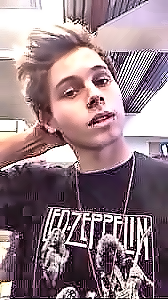

✅ Saved as balanced_enhanced_image.jpg


In [19]:
!pip install opencv-python pillow numpy --quiet
from google.colab import files
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 1: Denoise slightly
denoised = cv2.fastNlMeansDenoisingColored(img, None, 3, 3, 7, 21)

# Step 2: Smooth contrast adjustment
lab = cv2.cvtColor(denoised, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l2 = clahe.apply(l)
lab = cv2.merge((l2, a, b))
enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Step 3: Gentle sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5.2, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, kernel)

# Step 4: Slight smoothing to remove artifacts
final = cv2.bilateralFilter(sharpened, 7, 50, 50)

# Save & display
output = Image.fromarray(final)
display(output)
output.save("balanced_enhanced_image.jpg")

print("✅ Saved as balanced_enhanced_image.jpg")
